In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, MaxAbsScaler

In [143]:
df = pd.read_csv('../Dataset/iRent去識別化數據(僅供本次賽事使用)_20220627/iRent顧客租車交易資料.csv', encoding= 'big5')
print(df.shape)
df.head()

(403331, 15)


,iRent_1,iRent_2,iRent_3,iRent_4,iRent_5,iRent_6,iRent_7,iRent_8,iRent_9,iRent_10,iRent_11,iRent_12,iRent_13,iRent_14,iRent_15
0,A10002139,31-35,M,台北市,文山區,40366241,2021/04/01 18:06:14,516,2021/04/01 18:10:20,2021/04/01 22:12:29,40.0,RCF-6972,TOYOTA/PRIUSc,car,201904
1,A10002478,31-35,M,台北市,中正區,73561565,2021/04/11 11:40:08,37,2021/04/11 11:42:09,2021/04/11 12:06:09,5.5,EWA-0325,KYMCO/MANY-110,motor,201909
2,A10002478,31-35,M,台北市,中正區,113588372,2021/04/24 12:05:24,19,2021/04/24 12:07:29,2021/04/24 12:19:04,2.5,EWH-7300,KYMCO/MANY-110,motor,201911
3,A10002651,31-35,M,新北市,永和區,79976100,2021/04/13 13:36:36,717,2021/04/13 13:40:21,2021/04/13 16:41:53,90.0,RCK-8260,TOYOTA/YARIS,car,201901
4,A10002984,31-35,M,台北市,文山區,58906802,2021/04/06 19:30:49,284,2021/04/06 19:42:04,2021/04/06 20:46:05,45.0,RCF-8171,TOYOTA/PRIUSc,car,201906


In [144]:
df["iRent_7"] = pd.to_datetime(df["iRent_7"])
df["iRent_9"] = pd.to_datetime(df["iRent_9"])
df["iRent_10"] = pd.to_datetime(df["iRent_10"])

df['date_dow_name'] = df['iRent_9'].dt.day_name()
df['date_is_weekend'] = np.where(df['date_dow_name'].isin(['Sunday', 'Saturday']),1,0)
df['hour'] = df['iRent_9'].dt.hour
df['travel_time'] = round((df["iRent_10"] - df["iRent_9"])/ np.timedelta64(1, 'm'))

df.head()

,iRent_1,iRent_2,iRent_3,iRent_4,iRent_5,iRent_6,iRent_7,iRent_8,iRent_9,iRent_10,iRent_11,iRent_12,iRent_13,iRent_14,iRent_15,date_dow_name,date_is_weekend,hour,travel_time
0,A10002139,31-35,M,台北市,文山區,40366241,2021-04-01 18:06:14,516,2021-04-01 18:10:20,2021-04-01 22:12:29,40.0,RCF-6972,TOYOTA/PRIUSc,car,201904,Thursday,0,18,242.0
1,A10002478,31-35,M,台北市,中正區,73561565,2021-04-11 11:40:08,37,2021-04-11 11:42:09,2021-04-11 12:06:09,5.5,EWA-0325,KYMCO/MANY-110,motor,201909,Sunday,1,11,24.0
2,A10002478,31-35,M,台北市,中正區,113588372,2021-04-24 12:05:24,19,2021-04-24 12:07:29,2021-04-24 12:19:04,2.5,EWH-7300,KYMCO/MANY-110,motor,201911,Saturday,1,12,12.0
3,A10002651,31-35,M,新北市,永和區,79976100,2021-04-13 13:36:36,717,2021-04-13 13:40:21,2021-04-13 16:41:53,90.0,RCK-8260,TOYOTA/YARIS,car,201901,Tuesday,0,13,182.0
4,A10002984,31-35,M,台北市,文山區,58906802,2021-04-06 19:30:49,284,2021-04-06 19:42:04,2021-04-06 20:46:05,45.0,RCF-8171,TOYOTA/PRIUSc,car,201906,Tuesday,0,19,64.0


In [145]:
def NewAge(df):
    arr = df['iRent_2'].unique()
    
    for i in range(len(arr)):
        age_lst = list(map(int, arr[i].split('-')))
        df['iRent_2']= df['iRent_2'].replace(arr[i], sum(age_lst)/ len(age_lst))
    
    return df

df = NewAge(df)
df.head()

,iRent_1,iRent_2,iRent_3,iRent_4,iRent_5,iRent_6,iRent_7,iRent_8,iRent_9,iRent_10,iRent_11,iRent_12,iRent_13,iRent_14,iRent_15,date_dow_name,date_is_weekend,hour,travel_time
0,A10002139,33.0,M,台北市,文山區,40366241,2021-04-01 18:06:14,516,2021-04-01 18:10:20,2021-04-01 22:12:29,40.0,RCF-6972,TOYOTA/PRIUSc,car,201904,Thursday,0,18,242.0
1,A10002478,33.0,M,台北市,中正區,73561565,2021-04-11 11:40:08,37,2021-04-11 11:42:09,2021-04-11 12:06:09,5.5,EWA-0325,KYMCO/MANY-110,motor,201909,Sunday,1,11,24.0
2,A10002478,33.0,M,台北市,中正區,113588372,2021-04-24 12:05:24,19,2021-04-24 12:07:29,2021-04-24 12:19:04,2.5,EWH-7300,KYMCO/MANY-110,motor,201911,Saturday,1,12,12.0
3,A10002651,33.0,M,新北市,永和區,79976100,2021-04-13 13:36:36,717,2021-04-13 13:40:21,2021-04-13 16:41:53,90.0,RCK-8260,TOYOTA/YARIS,car,201901,Tuesday,0,13,182.0
4,A10002984,33.0,M,台北市,文山區,58906802,2021-04-06 19:30:49,284,2021-04-06 19:42:04,2021-04-06 20:46:05,45.0,RCF-8171,TOYOTA/PRIUSc,car,201906,Tuesday,0,19,64.0


In [146]:
def labelEncoder(df):
    le = LabelEncoder()
    for col in df[['iRent_3', 'iRent_13', 'iRent_14']]:
        df[col]=le.fit_transform(df[col])
    #df = df.reset_index()
    return df

df = labelEncoder(df)
df.head()

,iRent_1,iRent_2,iRent_3,iRent_4,iRent_5,iRent_6,iRent_7,iRent_8,iRent_9,iRent_10,iRent_11,iRent_12,iRent_13,iRent_14,iRent_15,date_dow_name,date_is_weekend,hour,travel_time
0,A10002139,33.0,1,台北市,文山區,40366241,2021-04-01 18:06:14,516,2021-04-01 18:10:20,2021-04-01 22:12:29,40.0,RCF-6972,3,0,201904,Thursday,0,18,242.0
1,A10002478,33.0,1,台北市,中正區,73561565,2021-04-11 11:40:08,37,2021-04-11 11:42:09,2021-04-11 12:06:09,5.5,EWA-0325,0,1,201909,Sunday,1,11,24.0
2,A10002478,33.0,1,台北市,中正區,113588372,2021-04-24 12:05:24,19,2021-04-24 12:07:29,2021-04-24 12:19:04,2.5,EWH-7300,0,1,201911,Saturday,1,12,12.0
3,A10002651,33.0,1,新北市,永和區,79976100,2021-04-13 13:36:36,717,2021-04-13 13:40:21,2021-04-13 16:41:53,90.0,RCK-8260,7,0,201901,Tuesday,0,13,182.0
4,A10002984,33.0,1,台北市,文山區,58906802,2021-04-06 19:30:49,284,2021-04-06 19:42:04,2021-04-06 20:46:05,45.0,RCF-8171,3,0,201906,Tuesday,0,19,64.0


Train Data

In [147]:
#df_train = df[(df['iRent_4'] == '台北市')|(df['iRent_4'] == '新北市')]
df_train = df[(df['iRent_4'] == '台北市')]
print(df_train.shape)

df_train.head()

(107780, 19)


,iRent_1,iRent_2,iRent_3,iRent_4,iRent_5,iRent_6,iRent_7,iRent_8,iRent_9,iRent_10,iRent_11,iRent_12,iRent_13,iRent_14,iRent_15,date_dow_name,date_is_weekend,hour,travel_time
0,A10002139,33.0,1,台北市,文山區,40366241,2021-04-01 18:06:14,516,2021-04-01 18:10:20,2021-04-01 22:12:29,40.0,RCF-6972,3,0,201904,Thursday,0,18,242.0
1,A10002478,33.0,1,台北市,中正區,73561565,2021-04-11 11:40:08,37,2021-04-11 11:42:09,2021-04-11 12:06:09,5.5,EWA-0325,0,1,201909,Sunday,1,11,24.0
2,A10002478,33.0,1,台北市,中正區,113588372,2021-04-24 12:05:24,19,2021-04-24 12:07:29,2021-04-24 12:19:04,2.5,EWH-7300,0,1,201911,Saturday,1,12,12.0
4,A10002984,33.0,1,台北市,文山區,58906802,2021-04-06 19:30:49,284,2021-04-06 19:42:04,2021-04-06 20:46:05,45.0,RCF-8171,3,0,201906,Tuesday,0,19,64.0
6,A10007742,33.0,1,台北市,文山區,51123018,2021-04-04 12:17:11,45,2021-04-04 12:34:16,2021-04-04 13:03:01,9.2,EWA-3216,0,1,201903,Sunday,1,12,29.0


In [148]:
def labelEncoder(df):
    le = LabelEncoder()
    for col in df[['iRent_5', 'date_dow_name']]:
        df[col]=le.fit_transform(df[col])
    return df

In [149]:
df_train = labelEncoder(df_train)
df_train.head()

/var/folders/5p/l1vljrjn45z85cmn9hgfwyfh0000gn/T/ipykernel_89655/1212574841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=le.fit_transform(df[col])


,iRent_1,iRent_2,iRent_3,iRent_4,iRent_5,iRent_6,iRent_7,iRent_8,iRent_9,iRent_10,iRent_11,iRent_12,iRent_13,iRent_14,iRent_15,date_dow_name,date_is_weekend,hour,travel_time
0,A10002139,33.0,1,台北市,9,40366241,2021-04-01 18:06:14,516,2021-04-01 18:10:20,2021-04-01 22:12:29,40.0,RCF-6972,3,0,201904,4,0,18,242.0
1,A10002478,33.0,1,台北市,1,73561565,2021-04-11 11:40:08,37,2021-04-11 11:42:09,2021-04-11 12:06:09,5.5,EWA-0325,0,1,201909,3,1,11,24.0
2,A10002478,33.0,1,台北市,1,113588372,2021-04-24 12:05:24,19,2021-04-24 12:07:29,2021-04-24 12:19:04,2.5,EWH-7300,0,1,201911,2,1,12,12.0
4,A10002984,33.0,1,台北市,9,58906802,2021-04-06 19:30:49,284,2021-04-06 19:42:04,2021-04-06 20:46:05,45.0,RCF-8171,3,0,201906,5,0,19,64.0
6,A10007742,33.0,1,台北市,9,51123018,2021-04-04 12:17:11,45,2021-04-04 12:34:16,2021-04-04 13:03:01,9.2,EWA-3216,0,1,201903,3,1,12,29.0


In [150]:
df_train.columns

Index(['iRent_1', 'iRent_2', 'iRent_3', 'iRent_4', 'iRent_5', 'iRent_6',
       'iRent_7', 'iRent_8', 'iRent_9', 'iRent_10', 'iRent_11', 'iRent_12',
       'iRent_13', 'iRent_14', 'iRent_15', 'date_dow_name', 'date_is_weekend',
       'hour', 'travel_time'],
      dtype='object')

In [151]:
def maxabsScaler(df):
   x = df[['iRent_2', 'iRent_8', 'iRent_11', 'travel_time']]
   xcol = df[['iRent_1', 'iRent_3', 'iRent_4', 'iRent_5', 'iRent_6', 'iRent_7', 'iRent_9', 'iRent_10', 'iRent_12',
       'iRent_13', 'iRent_14', 'iRent_15', 'date_dow_name', 'date_is_weekend','hour']]

   scaler_gnb = MaxAbsScaler()
   scale_x = scaler_gnb.fit_transform(x)
   MAscaled_df = pd.DataFrame(data=scale_x,columns= ['iRent_2', 'iRent_8', 'iRent_11', 'travel_time'] )

   xcol.reset_index(drop=True, inplace=True)
   MAscaled_df.reset_index(drop=True, inplace=True)
   MAscaled_df = pd.concat([xcol, MAscaled_df], axis=1)
   MAscaled_df.columns = ['iRent_1', 'iRent_3', 'iRent_4', 'iRent_5', 'iRent_6', 'iRent_7', 'iRent_9', 'iRent_10', 'iRent_12',
      'iRent_13', 'iRent_14', 'iRent_15', 'date_dow_name', 'date_is_weekend','hour', 'iRent_2', 'iRent_8', 'iRent_11', 'travel_time']

   return MAscaled_df

In [152]:
df_train = maxabsScaler(df_train)
df_train.head()

,iRent_1,iRent_3,iRent_4,iRent_5,iRent_6,iRent_7,iRent_9,iRent_10,iRent_12,iRent_13,iRent_14,iRent_15,date_dow_name,date_is_weekend,hour,iRent_2,iRent_8,iRent_11,travel_time
0,A10002139,1,台北市,9,40366241,2021-04-01 18:06:14,2021-04-01 18:10:20,2021-04-01 22:12:29,RCF-6972,3,0,201904,4,0,18,0.568966,0.051714,0.028923,0.023686
1,A10002478,1,台北市,1,73561565,2021-04-11 11:40:08,2021-04-11 11:42:09,2021-04-11 12:06:09,EWA-0325,0,1,201909,3,1,11,0.568966,0.003708,0.003977,0.002349
2,A10002478,1,台北市,1,113588372,2021-04-24 12:05:24,2021-04-24 12:07:29,2021-04-24 12:19:04,EWH-7300,0,1,201911,2,1,12,0.568966,0.001904,0.001808,0.001175
3,A10002984,1,台北市,9,58906802,2021-04-06 19:30:49,2021-04-06 19:42:04,2021-04-06 20:46:05,RCF-8171,3,0,201906,5,0,19,0.568966,0.028463,0.032538,0.006264
4,A10007742,1,台北市,9,51123018,2021-04-04 12:17:11,2021-04-04 12:34:16,2021-04-04 13:03:01,EWA-3216,0,1,201903,3,1,12,0.568966,0.004510,0.006652,0.002838


In [153]:
df_train = df_train[['iRent_3', 'iRent_5', 'iRent_13', 'iRent_14', 'date_is_weekend', 'hour', 
            'iRent_2', 'iRent_8', 'iRent_11', 'travel_time']]
df_train = df_train.rename({'iRent_3': 'gender', 'iRent_5': 'district', 'iRent_13': 'vehicle_model','iRent_14': 'vehicle_type',
            'iRent_2': 'age', 'iRent_8':'charge', 'iRent_11':'distance'}, axis=1) 

df_train.head()

,gender,district,vehicle_model,vehicle_type,date_is_weekend,hour,age,charge,distance,travel_time
0,1,9,3,0,0,18,0.568966,0.051714,0.028923,0.023686
1,1,1,0,1,1,11,0.568966,0.003708,0.003977,0.002349
2,1,1,0,1,1,12,0.568966,0.001904,0.001808,0.001175
3,1,9,3,0,0,19,0.568966,0.028463,0.032538,0.006264
4,1,9,0,1,1,12,0.568966,0.004510,0.006652,0.002838


In [154]:
df_train.isnull().sum()

gender             0
district           0
vehicle_model      0
vehicle_type       0
date_is_weekend    0
hour               0
age                0
charge             0
distance           0
travel_time        0
dtype: int64

In [155]:
#age_scope =list(df['iRent_4'].unique())
#city_eng = ['Taipei City', 'New Taipei City', 'Kaohsiung City','Taoyuan City', 'Keelung City', 'Taichung City', 'Hsinchu County','Tainan City',
#'Hsinchu City', 'Yunlin County', 'Yilan County', 'Chiayi County', 'Chiayi City', 'Changhua County', 'Nantou County', 'Kinmen County',
#'Miaoli County', 'Hualien County', 'Lianjiang County', 'Pingtung County', 'Taitung County', 'Penghu County']

#df = df.replace(city_chi, city_eng)

In [156]:
df_train

,gender,district,vehicle_model,vehicle_type,date_is_weekend,hour,age,charge,distance,travel_time
0,1,9,3,0,0,18,0.568966,0.051714,0.028923,0.023686
1,1,1,0,1,1,11,0.568966,0.003708,0.003977,0.002349
2,1,1,0,1,1,12,0.568966,0.001904,0.001808,0.001175
3,1,9,3,0,0,19,0.568966,0.028463,0.032538,0.006264
4,1,9,0,1,1,12,0.568966,0.004510,0.006652,0.002838
...,...,...,...,...,...,...,...,...,...,...
107775,0,1,3,0,1,16,0.482759,0.003307,0.007954,0.009005
107776,0,1,3,0,1,9,0.482759,0.015935,0.038322,0.008711
107777,0,1,3,0,1,17,0.482759,0.016236,0.039046,0.009200
107778,0,4,3,0,0,14,0.568966,0.067949,0.020246,0.035431


In [157]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107780 entries, 0 to 107779
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   gender           107780 non-null  int64  
 1   district         107780 non-null  int64  
 2   vehicle_model    107780 non-null  int64  
 3   vehicle_type     107780 non-null  int64  
 4   date_is_weekend  107780 non-null  int64  
 5   hour             107780 non-null  int64  
 6   age              107780 non-null  float64
 7   charge           107780 non-null  float64
 8   distance         107780 non-null  float64
 9   travel_time      107780 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 8.2 MB


In [158]:
df_train[[ 'gender', 'district', 'vehicle_model', 'vehicle_type', 'date_is_weekend', 'hour']] = df_train[['gender', 'district', 'vehicle_model', 'vehicle_type', 'date_is_weekend', 'hour']].astype(str)

In [159]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107780 entries, 0 to 107779
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   gender           107780 non-null  object 
 1   district         107780 non-null  object 
 2   vehicle_model    107780 non-null  object 
 3   vehicle_type     107780 non-null  object 
 4   date_is_weekend  107780 non-null  object 
 5   hour             107780 non-null  object 
 6   age              107780 non-null  float64
 7   charge           107780 non-null  float64
 8   distance         107780 non-null  float64
 9   travel_time      107780 non-null  float64
dtypes: float64(4), object(6)
memory usage: 8.2+ MB


In [160]:
import prince

famd = prince.FAMD(n_components=2, n_iter=3,
                   copy=True, check_input=True,
                   engine='auto',random_state=42)

famd = famd.fit(df_train)
coords = famd.row_coordinates(df_train)

In [161]:
coords.iloc[0:100,1]

0    -0.850851
1     0.523374
2     0.352174
3    -1.091188
4     0.129313
        ...   
95    0.016785
96    0.213724
97    0.103493
98    0.222023
99    0.084979
Name: 1, Length: 100, dtype: float64

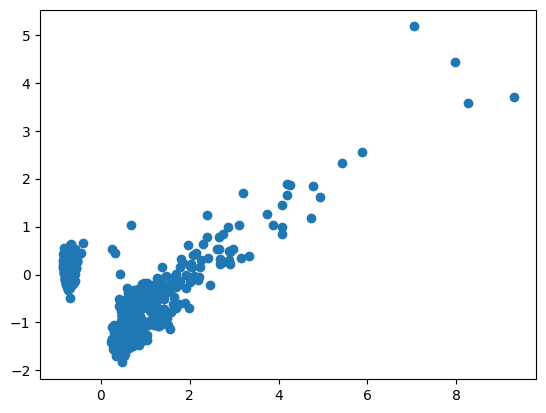

In [162]:
coords

plt.scatter(coords.iloc[0:1000, 0], coords.iloc[0:1000, 1])
plt.show()

In [171]:
coords.loc[0:1000]

,0,1
0,0.681126,-0.850851
1,-0.608322,0.523374
2,-0.672958,0.352174
3,0.504186,-1.091188
4,-0.605445,0.129313
...,...,...
996,-0.694210,0.625797
997,-0.650312,0.510945
998,-0.659217,0.256510
999,-0.775457,0.289294


In [164]:
df_train.loc[0:1000].district

0       9
1       1
2       1
3       9
4       9
       ..
996     8
997     8
998     8
999     8
1000    8
Name: district, Length: 1001, dtype: object

In [165]:
df_train.columns

Index(['gender', 'district', 'vehicle_model', 'vehicle_type',
       'date_is_weekend', 'hour', 'age', 'charge', 'distance', 'travel_time'],
      dtype='object')

ValueError: shapes (11,22) and (54,2) not aligned: 22 (dim 1) != 54 (dim 0)

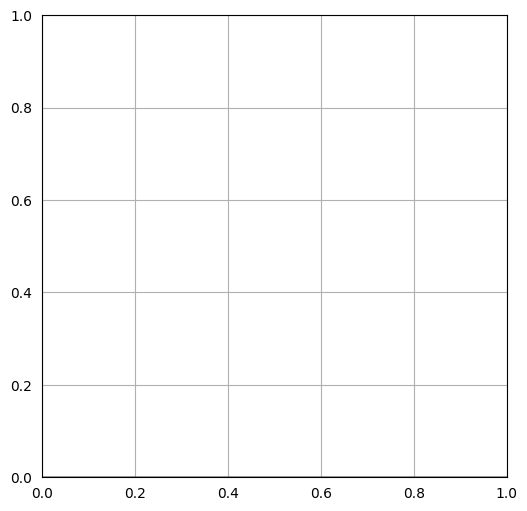

In [170]:
X = df_train.loc[0:10]
ax = famd.plot_row_coordinates(
X,
ax=None,
figsize=(6, 6),
x_component=0,
y_component=1,
labels=X.index,
color_labels=['district {}'.format(t) for t in X['district']],
ellipse_outline=False,
ellipse_fill=True,
show_points=True
)


In [126]:
X

,gender,district,vehicle_model,vehicle_type,date_is_weekend,hour,age,charge,distance,travel_time,vechicle_type
0,1,9,3,0,0,18,0.568966,0.051714,0.028923,0.023686,0
1,1,1,0,1,1,11,0.568966,0.003708,0.003977,0.002349,1
2,1,1,0,1,1,12,0.568966,0.001904,0.001808,0.001175,1
3,1,9,3,0,0,19,0.568966,0.028463,0.032538,0.006264,0
4,1,9,0,1,1,12,0.568966,0.004510,0.006652,0.002838,1
...,...,...,...,...,...,...,...,...,...,...,...
996,1,8,0,1,0,8,0.568966,0.001002,0.000506,0.000587,1
997,1,8,0,1,0,9,0.568966,0.001303,0.000795,0.000783,1
998,1,8,0,1,1,12,0.568966,0.002506,0.003977,0.001566,1
999,1,8,0,1,1,22,0.568966,0.001002,0.000651,0.000489,1


In [116]:
X = pd.DataFrame(
...     data=[
...         ['A', 'A', 'A', 2, 5, 7, 6, 3, 6, 7],
...         ['A', 'A', 'A', 4, 4, 4, 2, 4, 4, 3],
...         ['B', 'A', 'B', 5, 2, 1, 1, 7, 1, 1],
...         ['B', 'A', 'B', 7, 2, 1, 2, 2, 2, 2],
...         ['B', 'B', 'B', 3, 5, 6, 5, 2, 6, 6],
...         ['B', 'B', 'A', 3, 5, 4, 5, 1, 7, 5]
...     ],
...     columns=['E1 fruity', 'E1 woody', 'E1 coffee',
...              'E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody',
...              'E3 fruity', 'E3 butter', 'E3 woody'],
...     index=['Wine {}'.format(i+1) for i in range(6)]
... )
X['Oak type'] = [1, 2, 2, 2, 1, 1]

In [117]:
X

,E1 fruity,E1 woody,E1 coffee,E2 red fruit,E2 roasted,E2 vanillin,E2 woody,E3 fruity,E3 butter,E3 woody,Oak type
Wine 1,A,A,A,2,5,7,6,3,6,7,1
Wine 2,A,A,A,4,4,4,2,4,4,3,2
Wine 3,B,A,B,5,2,1,1,7,1,1,2
Wine 4,B,A,B,7,2,1,2,2,2,2,2
Wine 5,B,B,B,3,5,6,5,2,6,6,1
Wine 6,B,B,A,3,5,4,5,1,7,5,1


In [67]:
#df_pca = df_train[['district', 'date_is_weekend', 'hour', 'distance']]
df_pca = df_train[['age', 'charge', 'distance', 'travel_time']]
df_pca.head()

,age,charge,distance,travel_time
0,0.568966,0.051714,0.028923,0.023686
1,0.568966,0.003708,0.003977,0.002349
2,0.568966,0.001904,0.001808,0.001175
3,0.568966,0.028463,0.032538,0.006264
4,0.568966,0.004510,0.006652,0.002838


In [64]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(2)
df_pca = pca.fit_transform(df_pca)
df_pca.shape

(107780, 2)

In [65]:
xy = df_pca
xy

array([[-3.94047111e+00, -3.05061663e-03],
       [ 3.05941970e+00, -1.58978527e-02],
       [ 2.05941995e+00, -1.39575228e-02],
       ...,
       [-2.94070466e+00, -9.07393702e-02],
       [ 5.95438415e-02, -1.09212860e-02],
       [-2.94003572e+00, -7.97254955e-03]])

In [172]:
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(coords)

print(label)

[2 0 0 ... 2 2 1]


In [175]:
coords

,0,1
0,0.681126,-0.850851
1,-0.608322,0.523374
2,-0.672958,0.352174
3,0.504186,-1.091188
4,-0.605445,0.129313
...,...,...
107775,0.289961,-1.042553
107776,0.657195,-0.738433
107777,0.480636,-0.923188
107778,0.857193,-0.928125


In [182]:
u_labels = np.unique(label)

coords['label'] = label

In [189]:
coords['label'].unique()

array([2, 0, 4, 1, 3], dtype=int32)

In [191]:
coords

,0,1,label
0,0.681126,-0.850851,2
1,-0.608322,0.523374,0
2,-0.672958,0.352174,0
3,0.504186,-1.091188,2
4,-0.605445,0.129313,0
...,...,...,...
107775,0.289961,-1.042553,2
107776,0.657195,-0.738433,2
107777,0.480636,-0.923188,2
107778,0.857193,-0.928125,2


In [195]:
coords

,0,1,label
0,0.681126,-0.850851,2
1,-0.608322,0.523374,0
2,-0.672958,0.352174,0
3,0.504186,-1.091188,2
4,-0.605445,0.129313,0
...,...,...,...
107775,0.289961,-1.042553,2
107776,0.657195,-0.738433,2
107777,0.480636,-0.923188,2
107778,0.857193,-0.928125,2


In [196]:
plot_df = coords.iloc[0:1000] 

In [197]:
plot_df

,0,1,label
0,0.681126,-0.850851,2
1,-0.608322,0.523374,0
2,-0.672958,0.352174,0
3,0.504186,-1.091188,2
4,-0.605445,0.129313,0
...,...,...,...
995,-0.806004,0.266484,0
996,-0.694210,0.625797,0
997,-0.650312,0.510945,0
998,-0.659217,0.256510,0


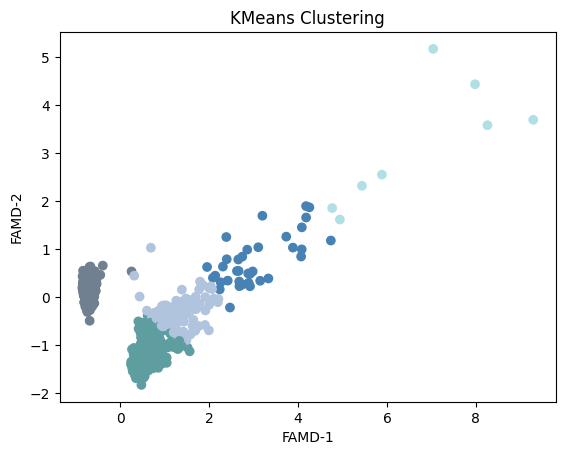

In [206]:
fig, ax = plt.subplots()


colors = {0:'slategrey', 1:'steelblue', 2:'cadetblue', 3:'powderblue', 4:'lightsteelblue'}


ax.scatter(plot_df[0], plot_df[1], c=plot_df['label'].map(colors))
plt.xlabel("FAMD-1")
plt.ylabel("FAMD-2")
plt.title('KMeans Clustering')
plt.show()

fig.savefig('Kmeans.png', transparent=True)

In [188]:
df.plot.scatter(x= 0, y= 1,c='label')

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not label

Error in callback <function _draw_all_if_interactive at 0x1226ab9a0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x2a76c00d0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
coords.plot

In [187]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(coords['labels' == i , 0] , coords['labels' == i , 1] , 'labels' = i)
plt.legend()
plt.show()

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2624935291.py, line 8)

In [178]:
coords[label == 0 , 0]

InvalidIndexError: (array([False,  True,  True, ..., False, False, False]), 0)

In [174]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = coords[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1], )
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

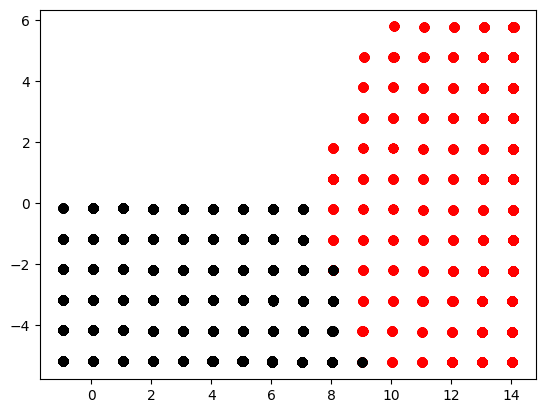

In [33]:
#filter rows of original data
filtered_label2 = df_pca[label == 2]
 
filtered_label8 = df_pca[label == 4]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

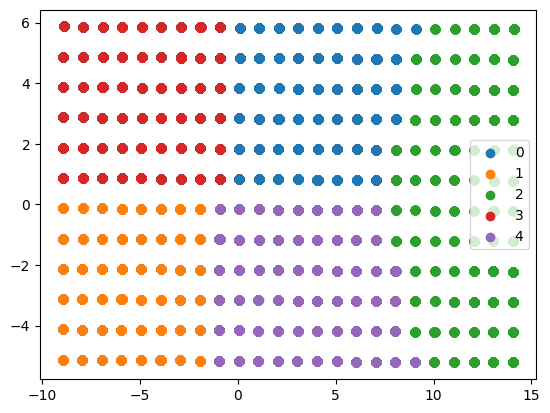

In [34]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()